<ipython-input-3-f15b636252ef>:60: UserWarning: Glyph 13217 (\N{SQUARE M SQUARED}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 13217 (\N{SQUARE M SQUARED}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


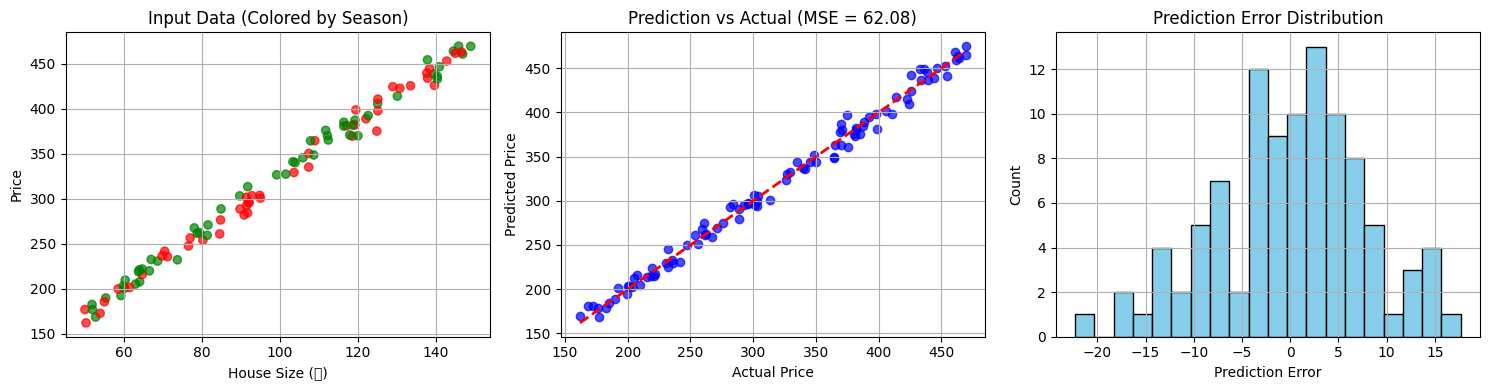

In [3]:
"""
Multiple Linear Regression Demo with Visualization
--------------------------------------------------
This script demonstrates fitting a multiple linear regression model and visualizing:
1. Input data distribution
2. Actual vs predicted prices
3. Prediction error histogram
"""

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Generate synthetic data
np.random.seed(1)
size = np.random.uniform(50, 150, 100).reshape(-1, 1)      # House size
season = np.random.randint(0, 2, 100).reshape(-1, 1)       # 0 = Winter, 1 = Summer
X = np.hstack([size, season])                              # Combine features

# Target: price = 3*size + 5*season + 20 + noise
noise = np.random.normal(0, 8, 100).reshape(-1, 1)
y = 3 * size + 5 * season + 20 + noise

# Fit model
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
mse = mean_squared_error(y, y_pred)

# ---------------------- Plot 1: Input data ----------------------
plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
colors = ['red' if s == 0 else 'green' for s in season]
plt.scatter(size, y, c=colors, alpha=0.7)
plt.xlabel("House Size (㎡)")
plt.ylabel("Price")
plt.title("Input Data (Colored by Season)")
plt.grid(True)

# ---------------------- Plot 2: Prediction vs Actual ----------------------
plt.subplot(1, 3, 2)
plt.scatter(y, y_pred, color="blue", alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(f"Prediction vs Actual (MSE = {mse:.2f})")
plt.grid(True)

# ---------------------- Plot 3: Error Histogram ----------------------
plt.subplot(1, 3, 3)
errors = y - y_pred
plt.hist(errors, bins=20, color="skyblue", edgecolor="black")
plt.xlabel("Prediction Error")
plt.ylabel("Count")
plt.title("Prediction Error Distribution")
plt.grid(True)

plt.tight_layout()
plt.show()
